In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
import keras
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
# No module named 'tensorflow'
"""
Data description: 
Gas turbine (GT1) 
Generator Watts Max Selected {Avg}
Exhaust Temp Median Corrected By Average {Avg}
Compressor Inlet Temperature {Avg}
IGV angle in deg {Avg}
Compressor Discharge Press Max Select {Avg}
Compressor Discharge Temperature {Avg}
"""
def start():
    return None

In [2]:
# read dataset from the file
filename = 'interview data.xlsx'
df = pd.read_excel(filename)
# Drop TimeStamp
df = df.drop(['TimeStamp'], axis=1)
# Five independent Variables
med_exh_tem = df['GT1 Exhaust Temp Median Corrected By Average {Avg}']
IGV_ang = df['GT1 IGV angle in deg {Avg}']
com_disch_pre_max = df['GT1 Compressor Discharge Press Max Select {Avg}']
com_inlet_tem = df['GT1 Compressor Inlet Temperature {Avg}']
com_disch_tem = df['GT1 Compressor Discharge Temperature {Avg}']
# one dependent Variable
gen_max_wat = df['GT1 Generator Watts Max Selected {Avg}']

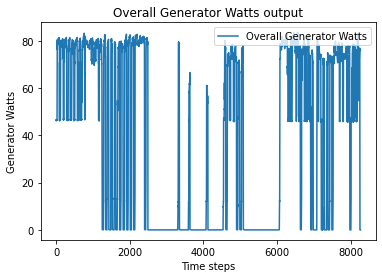

In [3]:
# plot the dataset (GT1 Generator Watts Max Selected {Avg})
plt.plot(gen_max_wat,label = 'Overall Generator Watts')
plt.title('Overall Generator Watts output')
plt.xlabel('Time steps')
plt.ylabel('Generator Watts')
plt.legend(loc = 1)
plt.show()

In [4]:
# There are some output = 0, turbine may be broken, find the most related variable.(changed a lot)
sel_data = df[df['GT1 Generator Watts Max Selected {Avg}'] < 1]
print(sel_data.shape)

(3754, 6)


In [5]:
# Get the pearson correlation between each other
pearsoncorr0 = sel_data.corr(method='pearson')
pd.set_option('display.max_columns', 6)
print(pearsoncorr0)

                                                    GT1 Generator Watts Max Selected {Avg}  \
GT1 Generator Watts Max Selected {Avg}                                            1.000000   
GT1 Exhaust Temp Median Corrected By Average {Avg}                                0.523754   
GT1 Compressor Inlet Temperature {Avg}                                            0.248728   
GT1 IGV angle in deg {Avg}                                                        0.148271   
GT1 Compressor Discharge Press Max Select {Avg}                                   0.134102   
GT1 Compressor Discharge Temperature {Avg}                                        0.488317   

                                                    GT1 Exhaust Temp Median Corrected By Average {Avg}  \
GT1 Generator Watts Max Selected {Avg}                                                       0.523754    
GT1 Exhaust Temp Median Corrected By Average {Avg}                                           1.000000    
GT1 Compressor Inlet Te

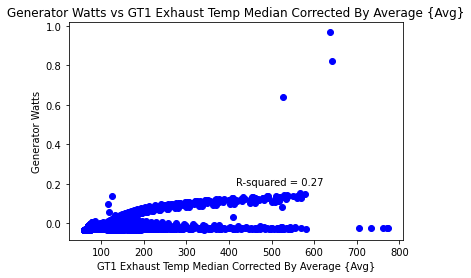

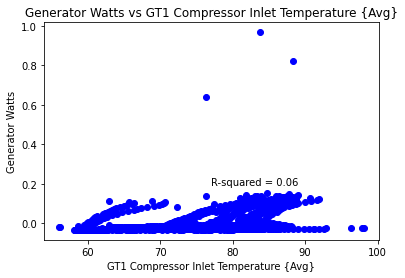

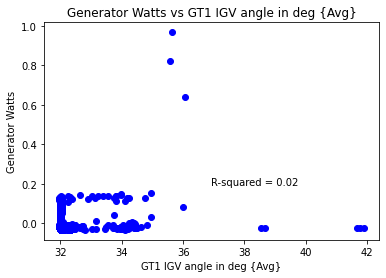

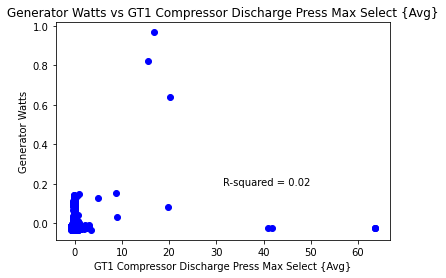

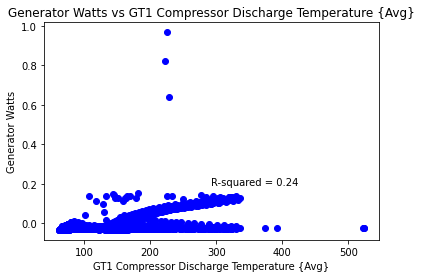

In [6]:
# Analyze the selected dataset:
# Five independent Variables
med_exh_tem0 = sel_data['GT1 Exhaust Temp Median Corrected By Average {Avg}']
com_inlet_tem0 = sel_data['GT1 Compressor Inlet Temperature {Avg}']
IGV_ang0 = sel_data['GT1 IGV angle in deg {Avg}']
com_disch_pre_max0 = sel_data['GT1 Compressor Discharge Press Max Select {Avg}']
com_disch_tem0 = sel_data['GT1 Compressor Discharge Temperature {Avg}']
# one dependent Variable
gen_max_wat0 = sel_data['GT1 Generator Watts Max Selected {Avg}']

# calculate R square
# Create bars and choose color
name = []
new_vars = [med_exh_tem0, com_inlet_tem0, IGV_ang0, com_disch_pre_max0, com_disch_tem0]
for col in sel_data.columns:
    name.append([col])
len_var = len(new_vars)
for i in range(len_var):
    plt.plot(new_vars[i], gen_max_wat0, 'o', color='blue')
    # Add title and axis names
    plt.title('Generator Watts vs {}'.format(name[i+1][0]))
    plt.xlabel('{}'.format(name[i+1][0]))
    plt.ylabel('Generator Watts')
    corr_matrix = np.corrcoef(new_vars[i], gen_max_wat0)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    plt.text(0.5, 0.25, 'R-squared = %0.2f' % R_sq, transform=plt.gca().transAxes)
    plt.show()

In [7]:
# For variable: 'GT1 Compressor Discharge Press Max Select {Avg}'
# , most of the experimental data is concentrated in the lower left corner (0-5)
# For variable: ''GT1 IGV angle in deg {Avg}''
# , most of the experimental data is concentrated in the lower left corner (32-35)
# Use these two variable to predict the output is 0
def analyze():
    return None

In [8]:
df = df.dropna()
print(df.shape)

(8260, 6)


In [9]:
# Selected variable based on above analyze:
# GT1 Exhaust Temp Median Corrected By Average {Avg}                                0.934648
# GT1 IGV angle in deg {Avg}                                                        0.993491
# GT1 Compressor Discharge Press Max Select {Avg}                                   0.990797
# GT1 Compressor Discharge Temperature {Avg}                                        0.934783
# med_exh_tem_average                                                               0.934844
# IGV_ang_average                                                                   0.989188
# com_disch_pre_max_average                                                         0.987999
# com_disch_tem_average                                                             0.935702
select_variable = ['GT1 Exhaust Temp Median Corrected By Average {Avg}','GT1 IGV angle in deg {Avg}'
                   , 'GT1 Compressor Discharge Press Max Select {Avg}',
              'GT1 Compressor Discharge Temperature {Avg}']
gen_wat = ['GT1 Generator Watts Max Selected {Avg}']

X = df[select_variable].values
y = df[gen_wat].values

In [10]:
# Sandardization of data
PredictorScaler = MinMaxScaler(feature_range = (0, 1))
TargetVarScaler = MinMaxScaler(feature_range = (0, 1))

# Generating the standardized values of X and y
X = PredictorScaler.fit_transform(X)
y = TargetVarScaler.fit_transform(y)

In [11]:
# Split the data into training and testing set, 30% as test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5782, 4) (5782, 1) (2478, 4) (2478, 1)


In [12]:
# Finding best hyperparameters of ANN using GridSearchCV
def make_regression_ann(Optimizer_trial):
    model = Sequential()
    # Defining the Input layer (4) and FIRST hidden layer (7),
    model.add(Dense(units=7, input_dim=4, kernel_initializer='normal', activation='relu'))
    # Defining the Second layer of the model
    model.add(Dense(units=7, kernel_initializer='normal', activation='tanh'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig, pred):
    corr_matrix = np.corrcoef(orig, pred)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    
    print('#' * 50, 'R Squared:', R_sq)
    return R_sq

In [41]:
# Creating the regression ANN model
# RegModel = KerasRegressor(make_regression_ann, verbose=0)
RegModel = keras.wrappers.scikit_learn.KerasRegressor(make_regression_ann, verbose=0)
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)
# Listing all the parameters to try
Parameter_Trials = {'batch_size': [10, 20, 30],
                    'epochs': [10, 15, 20],
                    'Optimizer_trial': ['adam', 'rmsprop']
                    }
# Creating the Grid search space
grid_search = GridSearchCV(estimator=RegModel,
                           param_grid=Parameter_Trials,
                           scoring=custom_Scoring,
                           cv=5)

grid_search = grid_search.fit(X_train, y_train, verbose=1)
# print('Printing Best parameters: ', grid_search.best_params_)

In [14]:
print('Printing Best parameters: ', grid_search.best_params_)

Printing Best parameters:  {'Optimizer_trial': 'adam', 'batch_size': 10, 'epochs': 10}


In [15]:
# Training the ANN model with the best parameters
# Fitting the ANN to the Training set
model = Sequential()
model.add(Dense(units=7, input_dim=4, kernel_initializer='normal', activation='relu')) # Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=7, kernel_initializer='normal', activation='tanh')) # Defining the Second layer of the model
model.add(Dense(1, kernel_initializer='normal')) # The output neuron is a single fully connected node
model.compile(loss='mean_squared_error', optimizer='adam') # Compiling the model
model.fit(X_train, y_train ,batch_size = 10, epochs = 10, verbose=0)
Predictions=model.predict(X_test)

Predictions=TargetVarScaler.inverse_transform(Predictions) # back to original value
y_test_orig=TargetVarScaler.inverse_transform(y_test)
Test_Data=PredictorScaler.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=select_variable)
TestingData['Generate Watts']=y_test_orig
TestingData['Predicted Watts']=Predictions
TestingData.head()


# Calculate the error between the actual value and the predicted value
Error=abs(TestingData['Generate Watts']-TestingData['Predicted Watts'])# Computing the absolute percent error
TestingData['Error']=Error

# Finding the R^2 of the model
corr_matrix = np.corrcoef(TestingData['Generate Watts'], TestingData['Predicted Watts'])
corr = corr_matrix[0,1]
R_sq = corr**2
print('The R^2 of ANN model is:', R_sq)
TestingData.head()

The R^2 of ANN model is: 0.9979149809002641


,GT1 Exhaust Temp Median Corrected By Average {Avg},GT1 IGV angle in deg {Avg},GT1 Compressor Discharge Press Max Select {Avg},...,Generate Watts,Predicted Watts,Error
0,61.643606,32.315319,-0.478618,...,-0.032427,0.184709,0.217136
1,69.125347,31.995942,0.302327,...,-0.019647,0.058030,0.077677
2,1099.973877,57.896737,112.888217,...,46.707737,46.141888,0.565849
3,72.354564,31.998320,0.024077,...,-0.025003,-0.047803,0.022800
4,1054.933006,83.033408,154.429976,...,72.464828,74.971306,2.506478


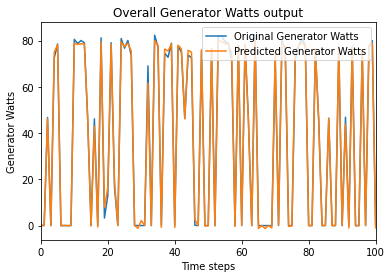

In [16]:
# plot the dataset with the first 100 predicted dataset
plt.plot(TestingData['Generate Watts'],label = 'Original Generator Watts')
plt.plot(TestingData['Predicted Watts'],label = 'Predicted Generator Watts')
plt.title('Overall Generator Watts output')
plt.xlabel('Time steps')
plt.ylabel('Generator Watts')
plt.legend(loc = 1)
plt.xlim([0, 100])
plt.show()

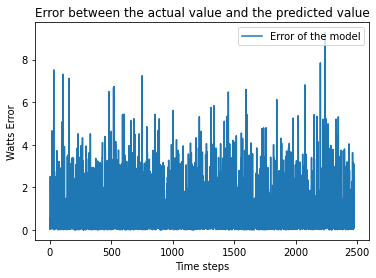

The Average Error: 1.088474810201012


In [17]:
# plot the accuracy of the model
plt.plot(TestingData['Error'],label = 'Error of the model')
plt.title('Error between the actual value and the predicted value')
plt.xlabel('Time steps')
plt.ylabel('Watts Error')
plt.legend(loc = 1)
#plt.xlim([0, 100])
plt.show()
print('The Average Error:', np.mean(Error))

In [18]:
# row['GT1 Compressor Discharge Press Max Select {Avg}'] < 5, item[2]
# and row['GT1 IGV angle in deg {Avg}'] < 35, item[1] < 35, item[1]
predic = list(Predictions)
text_original = PredictorScaler.inverse_transform(X_test)
res = []
for i in range(len(text_original)):
    if text_original[i][2] < 5 and text_original[i][1] < 35:
        res.append(0)
    else:
        res.append(predic[i][0])
Combine_res = np.asarray(res)

In [19]:
# Analysis the Combine model:

TestingData1=pd.DataFrame(data=Test_Data, columns=select_variable)
TestingData1['Generate Watts']=y_test_orig
TestingData1['Predicted Watts']=Combine_res
TestingData1.head()

# Calculate the error between the actual value and the predicted value
Error=abs(TestingData1['Generate Watts']-TestingData1['Predicted Watts'])# Computing the absolute percent error
TestingData1['Error']=Error

# Finding the R^2 of the model
corr_matrix = np.corrcoef(TestingData1['Generate Watts'], TestingData1['Predicted Watts'])
corr = corr_matrix[0,1]
R_sq = corr**2
print('The R^2 of ANN model is:', R_sq)
TestingData1.head()

The R^2 of ANN model is: 0.9980423194726553


,GT1 Exhaust Temp Median Corrected By Average {Avg},GT1 IGV angle in deg {Avg},GT1 Compressor Discharge Press Max Select {Avg},...,Generate Watts,Predicted Watts,Error
0,61.643606,32.315319,-0.478618,...,-0.032427,0.000000,0.032427
1,69.125347,31.995942,0.302327,...,-0.019647,0.000000,0.019647
2,1099.973877,57.896737,112.888217,...,46.707737,46.141888,0.565849
3,72.354564,31.998320,0.024077,...,-0.025003,0.000000,0.025003
4,1054.933006,83.033408,154.429976,...,72.464828,74.971306,2.506478


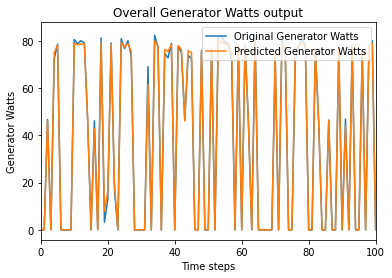

In [20]:
# plot the dataset with the first 100 predicted dataset
plt.plot(TestingData1['Generate Watts'],label = 'Original Generator Watts')
plt.plot(TestingData1['Predicted Watts'],label = 'Predicted Generator Watts')
plt.title('Overall Generator Watts output')
plt.xlabel('Time steps')
plt.ylabel('Generator Watts')
plt.legend(loc = 1)
plt.xlim([0, 100])
plt.show()

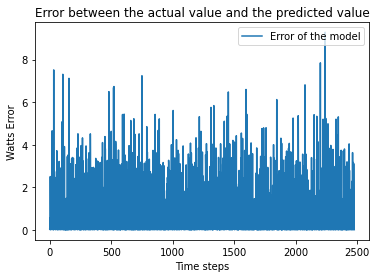

The Average Error: 0.9463337103020106


In [21]:
# plot the accuracy of the model
plt.plot(TestingData1['Error'],label = 'Error of the model')
plt.title('Error between the actual value and the predicted value')
plt.xlabel('Time steps')
plt.ylabel('Watts Error')
plt.legend(loc = 1)
#plt.xlim([0, 100])
plt.show()
print('The Average Error:', np.mean(Error))

In [22]:
# The Average Error decrease a lot 
# From 1.2249424420916317 to 0.6589024247075902
# The R square value also increased from 0.9979149809002641 to 0.9980423194726553
def name():
    return 'Shengbin Wang'
# Reference:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
# https://www.askpython.com/python/coefficient-of-determination
# https://www.bogotobogo.com/python/scikit-learn/Artificial-Neural-Network-ANN-1-Introduction.php
# https://thinkingneuron.com/how-to-find-best-hyperparameters-using-gridsearchcv-in-python/
# https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/

In [38]:
class ANN_model_no():
    def predict(input):
        newadd =[]
        for i in range(len(input)):
            if i != 1:
                newadd.append(input[i])
        xx = newadd
        if xx[2] < 5 and xx[1] < 35:
            return 0
        else:
            a = np.array([xx])
            tem = PredictorScaler.transform(a)
            test1 = model.predict(tem)
            resl = TargetVarScaler.inverse_transform(test1)
            return resl[0][0]

In [39]:
import pickle
pickle.dump(ANN_model_no, open( "annmodel_nonew", "wb" ))